<a href="https://colab.research.google.com/github/MUHAMMED-ALAAEDDIN/Veri_madencilgi/blob/main/Veri_Madencili%C4%9Fi_Final_Proje1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 'Kan Nakli Hizmet Merkezi' verisetini one drive'e yükleme

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Veriseti notebook'e aktarma

In [18]:
import pandas as pd
dataset = pd.read_csv( '/content/drive/My Drive/Veri_madenciliği_ödevi/transfusion.csv')
dataset.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Satır ve sütun sayısı

In [19]:
# Satır ve sütun sayısı
rows_col = dataset.shape
print ( "Veri kümesindeki toplam satır sayısı: {}" . format ( rows_col [ 0 ] ) )  
print ( "Veri kümesindeki toplam sütun sayısı : {}" . format ( rows_col [ 1 ] )) 

Veri kümesindeki toplam satır sayısı: 748
Veri kümesindeki toplam sütun sayısı : 5


# Her sütundaki Eksik Değerlerin sayısını kontrolü

In [20]:
# Her sütundaki Eksik Değerlerin sayısını kontrol eden kod
dataset.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

# Hedef Değişkenin sayım grafiğini çizme
# (0 - kan bağışlamayan ve 1 - kan bağışlayan)

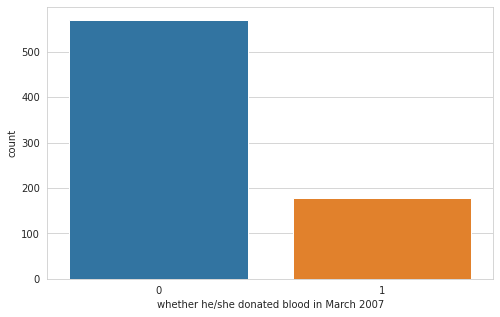

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x= "whether he/she donated blood in March 2007",data=dataset)

In [22]:
dataset["whether he/she donated blood in March 2007"].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64


# En son bağıştan bu yana geçen ay sayısı grafiği




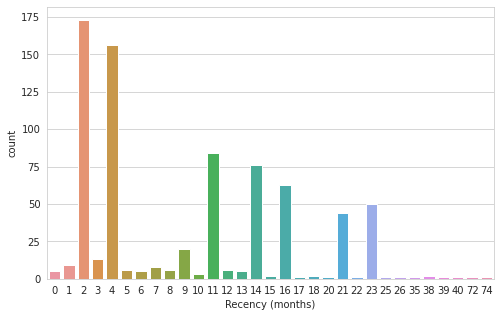

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x= "Recency (months)",data=dataset)

# Belirli bir donörün toplam kan bağış sayısı grafiği

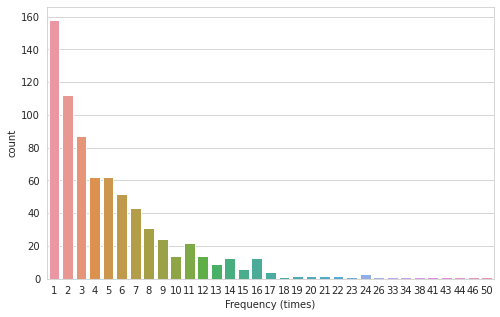

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x= "Frequency (times)",data=dataset)

# Bağışçının CC'de bağışladığı toplam kan miktarı grafiği

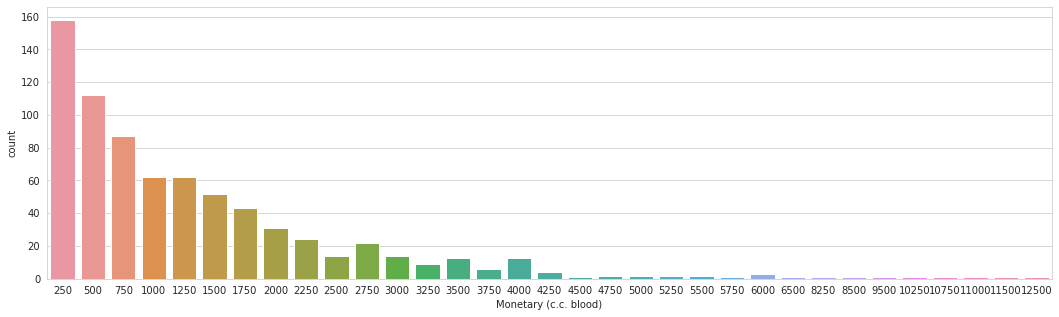

In [25]:
plt.figure(figsize=(18,5))
sns.countplot(x= "Monetary (c.c. blood)",data=dataset)

# Bağışçının ilk bağışından bu yana geçen ay sayısı grafiği

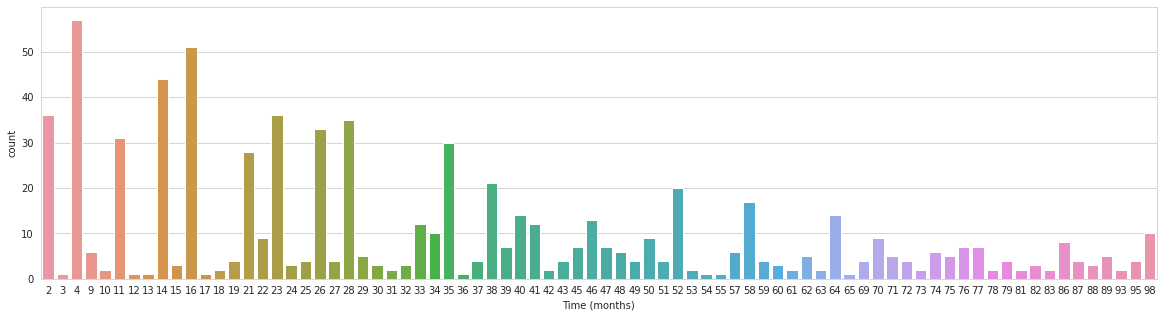

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(x= "Time (months)",data=dataset)

# Her bir niteliğin özellikleri için normalizasyon işlemi min-max yöntemi ile  gerçekleştirmek.

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Veri_madenciliği_ödevi/transfusion.csv')

# Split the dataset into features and target
X = df.drop('whether he/she donated blood in March 2007', axis=1)

# Normalize the features using min-max normalization
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Print the normalized features
print(X_norm)

[[0.02702703 1.         1.         1.        ]
 [0.         0.24489796 0.24489796 0.27083333]
 [0.01351351 0.30612245 0.30612245 0.34375   ]
 ...
 [0.31081081 0.04081633 0.04081633 0.625     ]
 [0.52702703 0.         0.         0.38541667]
 [0.97297297 0.         0.         0.72916667]]


# Entropy ve İnformation gain sınıflandırma yöntemi ile en iyi bölen niteliği bulup ekrana yazma

In [28]:
X = dataset.iloc[:, :-1] # select all rows, all columns except the last one
y = dataset.iloc[:, -1] # select all rows, last column only
import math

def entropy(y):
    counts = y.value_counts()
    entropy = 0
    for count in counts:
        p = count / len(y)
        entropy -= p * math.log(p, 2)
    return entropy

entropy_y = entropy(y)

def information_gain(X, y, feature):
    entropy_y = entropy(y)
    values = X[feature].unique()
    entropy_feature = 0
    for value in values:
        sub_y = y[X[feature] == value]
        p = len(sub_y) / len(y)
        entropy_feature += p * entropy(sub_y)
    return entropy_y - entropy_feature

best_feature = None
best_gain = 0

for feature in X.columns:
    gain = information_gain(X, y, feature)
    if gain > best_gain:
        best_gain = gain
        best_feature = feature

print(f'En iyi bölen nitelik: {best_feature}')

En iyi bölen nitelik: Recency (months)


# KNN ve Naive Bayes sınıflandırma yöntemleri ile sınıflandırma ve tahmin başarı değeri(oranı) bulup ekrana yazma

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Veri_madenciliği_ödevi/transfusion.csv')

# Split the dataset into features and targets
X = df.drop('whether he/she donated blood in March 2007', axis=1)
y = df['whether he/she donated blood in March 2007']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
knn_predictions = knn.predict(X_test)

# Calculate the accuracy of the KNN predictions
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN yöntemi ile normalizasyonu yapmadan sonuç = {knn_accuracy:.2f}')

# Initialize the naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Make predictions on the testing data
nb_predictions = nb.predict(X_test)

# Calculate the accuracy of the naive Bayes predictions
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f'Naive Bayes yöntemi ile normalizasyonu yapmadan sonuç = {nb_accuracy:.2f}')


KNN yöntemi ile normalizasyonu yapmadan sonuç = 0.71
Naive Bayes yöntemi ile normalizasyonu yapmadan sonuç = 0.75


# Önce niteliklerin özellikleri normalize edip sonra KNN ve Naive Bayes sınıflandırma yöntemleri ile sınıflandırma ve tahmin başarı değeri(oranı) bulup ekrana yazma

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Veri_madenciliği_ödevi/transfusion.csv')

# Split the dataset into features and target
X = df.drop('whether he/she donated blood in March 2007', axis=1)
y = df['whether he/she donated blood in March 2007']

# Normalize the features using min-max normalization
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Create the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = (predictions == y_test).mean()
print('KNN yöntemi ile normalizasyonu yapıldıktan sonra sonuç =', accuracy)

# Create the naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = (predictions == y_test).mean()
print('Naive Bayes yöntemi ile normalizasyonu yapıldıktan sonra sonuç =', accuracy)


KNN yöntemi ile normalizasyonu yapıldıktan sonra sonuç = 0.7066666666666667
Naive Bayes yöntemi ile normalizasyonu yapıldıktan sonra sonuç = 0.7533333333333333


#Bu kod da hem orjinal hem de normalize edilmiş niteliklerin özellikleri KNN ve Naive Bayes sınıflandırma yöntemleri ile sınıflandırma ve tahmin başarı değeri(oranı) bulup ekrana yazma

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Veri_madenciliği_ödevi/transfusion.csv')

# Split the dataset into features and target
X = df.drop('whether he/she donated blood in March 2007', axis=1)
y = df['whether he/she donated blood in March 2007']

# Normalize the features using min-max normalization
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Create the KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = (predictions == y_test).mean()
print('KNN yöntemi ile normalizasyonu yapmadan(orjinal özellikler)sonuç =', accuracy)

# Fit the classifier to the normalized training data
knn.fit(X_train_norm, y_train)

# Make predictions on the normalized test data
predictions = knn.predict(X_test_norm)

# Calculate the accuracy of the predictions
accuracy = (predictions == y_test).mean()
print('KNN yöntemi ile normalizasyonu yapıldıktan sonra (normalize edilmiş özellikler)sonuç =', accuracy)

# Create the naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = (predictions == y_test).mean()
print('Naive Bayes yöntemi ile normalizasyonu yapmadan(orjinal özellikler)sonuç =', accuracy)

# Fit the classifier to the normalized training data
nb.fit(X_train_norm, y_train)

# Make predictions on the normalized test data
predictions = nb.predict(X_test_norm)

# Calculate the accuracy of the predictions
accuracy = (predictions == y_test).mean()
print('Naive Bayes yöntemi ile normalizasyonu yapıldıktan sonra(normalize edilmiş özellikler) sonuç =', accuracy)


KNN yöntemi ile normalizasyonu yapmadan(orjinal özellikler)sonuç = 0.7066666666666667
KNN yöntemi ile normalizasyonu yapıldıktan sonra (normalize edilmiş özellikler)sonuç = 0.7066666666666667
Naive Bayes yöntemi ile normalizasyonu yapmadan(orjinal özellikler)sonuç = 0.7533333333333333
Naive Bayes yöntemi ile normalizasyonu yapıldıktan sonra(normalize edilmiş özellikler) sonuç = 0.7533333333333333
